In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [89]:
df=pd.read_csv('d:/dataset/forest_fires.csv')
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5


In [90]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


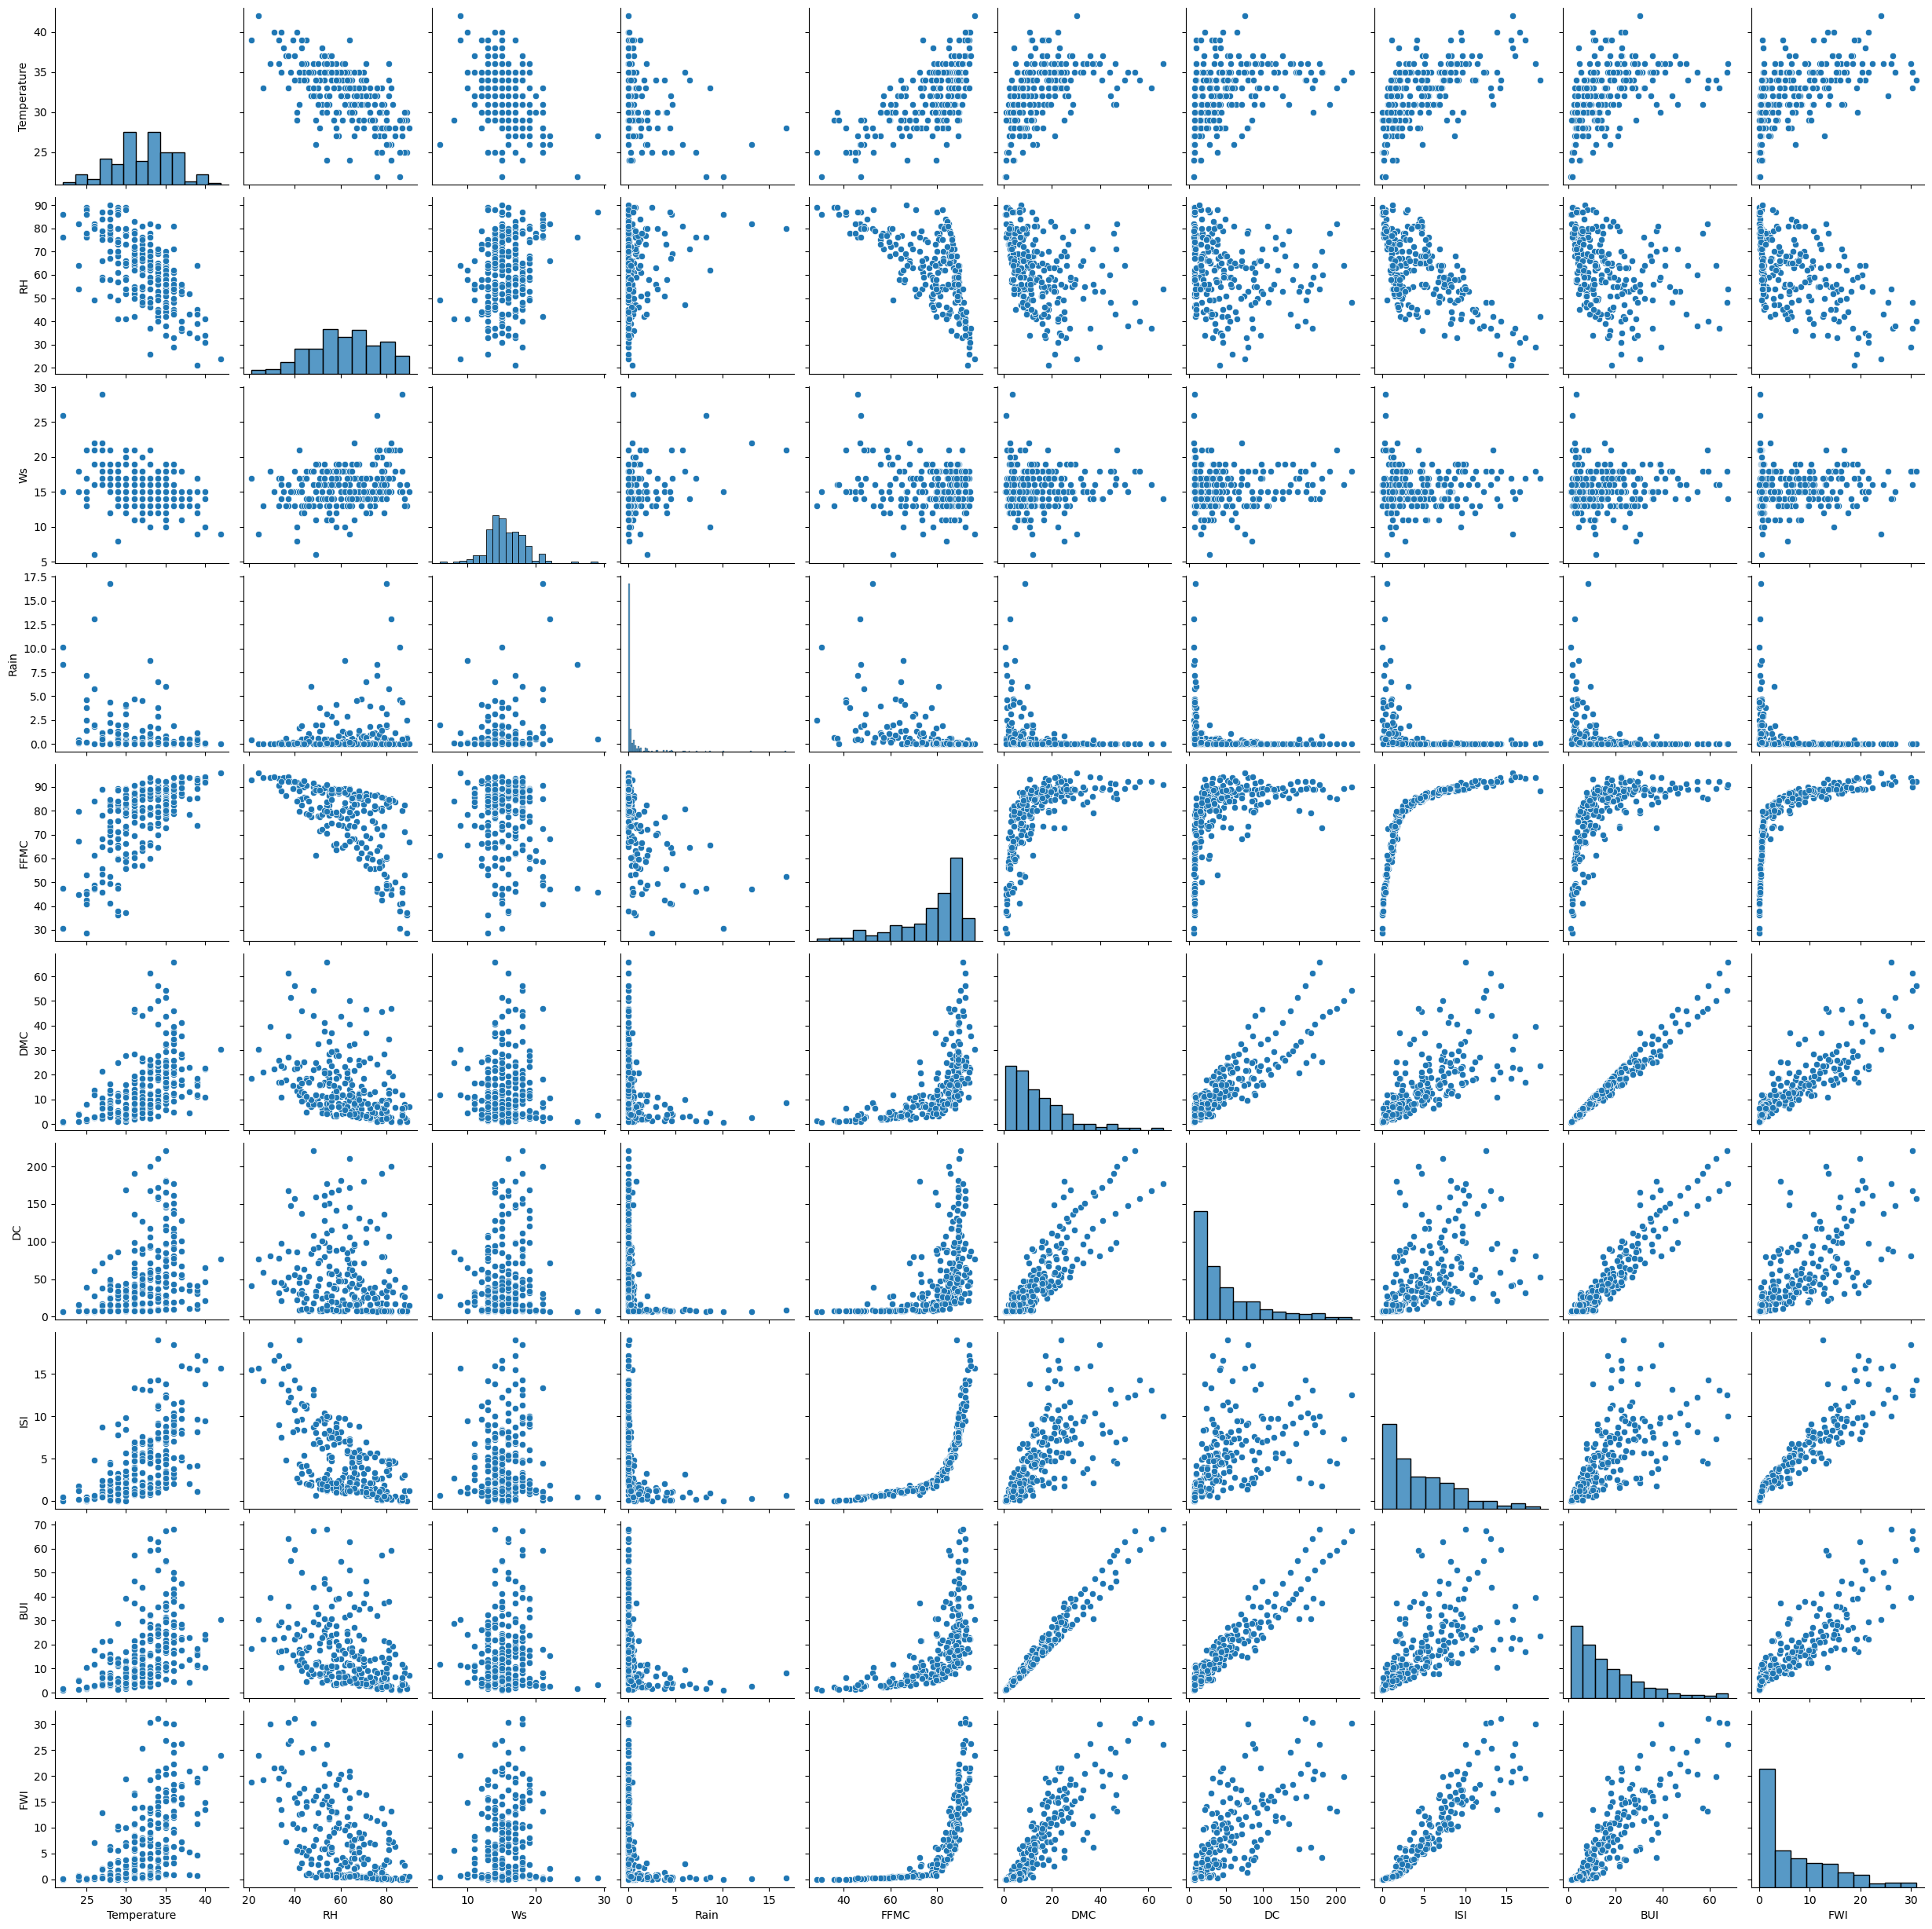

In [99]:
sn.pairplot(df)
plt.show()

In [91]:
X

array([[29. , 57. , 18. , ...,  7.6,  1.3,  3.4],
       [29. , 61. , 13. , ...,  7.6,  1. ,  3.9],
       [26. , 82. , 22. , ...,  7.1,  0.3,  2.7],
       ...,
       [27. , 87. , 29. , ...,  7.9,  0.4,  3.4],
       [24. , 54. , 18. , ..., 15.2,  1.7,  5.1],
       [24. , 64. , 15. , ..., 16.5,  1.2,  4.8]])

In [92]:
y

array([ 0.5,  0.4,  0.1,  0. ,  0.5,  2.5,  7.2,  7.1,  0.3,  0.9,  5.6,
        7.1,  0.2,  0.4,  0.1,  0. ,  0. ,  0.2,  1.4,  0.4,  2.2,  2.3,
        3.8,  7.5,  8.4, 10.6, 15. , 13.9,  3.9, 12.9,  0.4,  0.3,  0.5,
        1.7,  4.9,  6.8,  3.2,  8. ,  0.6,  0.5,  2.2,  0.9,  3.4,  0.8,
        0.5,  0.4,  3.6,  6. , 10.9,  4. ,  8.8,  2.8,  2.1,  1.3,  7.3,
       15.3, 15.3, 11.3, 11.9, 10.7, 15.7,  0.9,  0.8,  0.8,  3.9,  6.1,
        6.8,  8. ,  2.6,  9.9, 11.6, 12.1,  4.2, 10.2, 10.6,  6.3,  4.2,
       14.6, 16.1, 17.2, 16.8, 18.4, 20.4, 22.3, 20.9, 20.3, 13.7, 13.2,
       19.9, 30.2,  4.2,  0.3,  0.1,  0. ,  0. ,  0.5,  1.7,  0.9,  0.6,
        0.4,  0.2,  0.3,  0.3,  0.5,  0. ,  0.1,  0. ,  0.8,  5.9,  7.7,
        9.7,  6.3,  8.3,  2.8,  0.7,  0.7,  0.1,  1.7,  4.1,  0.9,  0.1,
        0.1,  0.2,  0.2,  0.1,  1. ,  0.9,  3.1,  6. ,  0.8,  1.9, 10. ,
       16.7, 12.9,  0.9,  0.3,  0.6,  0.1,  0.4,  0.4,  0.4,  0.3,  4.9,
        1.2,  0.8,  5.3,  6.7,  9.5, 12. , 18.4,  7

In [93]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=0)

In [94]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(218, 9)
(25, 9)
(218,)
(25,)


In [95]:
def linear_regression(X_train, y_train, X_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return model, predictions


def ridge_regression(X_train, y_train, X_test, alpha=1.0):
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return model, predictions


def lasso_regression(X_train, y_train, X_test, alpha=1.0):
    model = Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return model, predictions


def elastic_net_regression(X_train, y_train, X_test, alpha=1.0, l1_ratio=0.5):
    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return model, predictions


def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return mse, r2

In [96]:
linear_reg_model, linear_reg_predictions = linear_regression(X_train, y_train, X_test)
linear_reg_mse, r2 = evaluate_model(linear_reg_model, X_test, y_test)
print("Linear Regression MSE:", linear_reg_mse)
print("Linear Regression R-squared:", r2)

ridge_model, ridge_predictions = ridge_regression(X_train, y_train, X_test, alpha=0.5)
ridge_mse,r2 = evaluate_model(ridge_model, X_test, y_test)
print("Ridge Regression MSE:", ridge_mse)
print("Ridge Regression R-squared:",r2)

lasso_model, lasso_predictions = lasso_regression(X_train, y_train, X_test, alpha=0.5)
lasso_mse,r2 = evaluate_model(lasso_model, X_test, y_test)
print("Lasso Regression MSE:", lasso_mse)
print("Lasso Regression R-squared:",r2)

elastic_net_model, elastic_net_predictions = elastic_net_regression(X_train, y_train, X_test, alpha=0.5, l1_ratio=0.5)
elastic_net_mse,r2 = evaluate_model(elastic_net_model, X_test, y_test)
print("Elastic Net Regression MSE:", elastic_net_mse)
print("Elastic Net Regression R-squared:",r2)

Linear Regression MSE: 1.1478850627821413
Linear Regression R-squared: 0.9447943632872429
Ridge Regression MSE: 1.1489274979408068
Ridge Regression R-squared: 0.9447442290895502
Lasso Regression MSE: 1.310587213212334
Lasso Regression R-squared: 0.9369694720152337
Elastic Net Regression MSE: 1.3542472131940786
Elastic Net Regression R-squared: 0.934869716407273
